In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(10000, 10)

# Thompson Sampling Algorithm

## Simulation

In [7]:
import random
N = 500
d = 10
ads_selected = []
n1 = np.zeros(d)
n0 = np.zeros(d)
total_reward = 0

# Start looping from the rounds
for n in range(N):
    ad = 0 # Index of the add that has been selected
    max_random = 0 # Max random draw

    # Loop through all the adds
    for i in range(d):

        # Random draw from beta distribution
        random_beta = random.betavariate(n1[i]+1,n0[i]+1)

        # Select the ad that has the highest beta
        if (random_beta > max_random):
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward==1:
        n1[ad]+=1
    else:
        n0[ad]+=1
    total_reward+=reward

# Visualisation

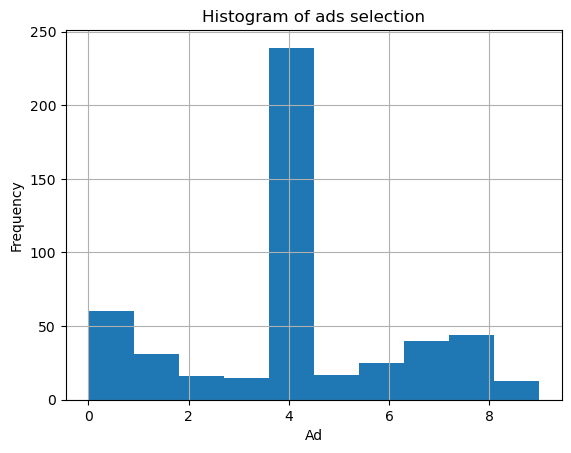

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ad')
plt.ylabel('Frequency')
plt.grid();

In [9]:
from ipywidgets import interact, IntSlider

In [12]:
@interact(n=IntSlider(min=0,max=10000,step=100,value=10000))
def ts(n):
    N = n
    d = 10
    ads_selected = []
    n1 = np.zeros(d)
    n0 = np.zeros(d)
    total_reward = 0
    
    # Start looping from the rounds
    for n in range(N):
        ad = 0 # Index of the add that has been selected
        max_random = 0 # Max random draw
    
        # Loop through all the adds
        for i in range(d):
    
            # Random draw from beta distribution
            random_beta = random.betavariate(n1[i]+1,n0[i]+1)
    
            # Select the ad that has the highest beta
            if (random_beta > max_random):
                max_random = random_beta
                ad = i
    
        ads_selected.append(ad)
        reward = dataset.values[n,ad]
        if reward==1:
            n1[ad]+=1
        else:
            n0[ad]+=1
        total_reward+=reward

    plt.hist(ads_selected)
    plt.title('Histogram of ads selection')
    plt.xlabel('Ad')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


interactive(children=(IntSlider(value=10000, description='n', max=10000, step=100), Output()), _dom_classes=('…